#Sentiment Analysis on Drug Review Dataset (Drugs.com)
Greta Gravina, g.gravina8@campus.unimib.it

## Data import

In [ ]:
## Import libraries
%%capture
import pandas as pd
import csv, html, re, itertools, scipy, time
import numpy as np
import warnings

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.manifold import TSNE
from wordcloud import WordCloud

# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

# Genism and sklearn
from gensim.models import LdaModel
from gensim import corpora
from sklearn.manifold import TSNE

# Filter warning
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Text Mining/data_train_class_balanced_9-4.csv").drop('Unnamed: 0', axis = 1)
data['review'] = data['review'].apply(html.unescape)

## Data Visualization

Word Cloud: the most popular drugs

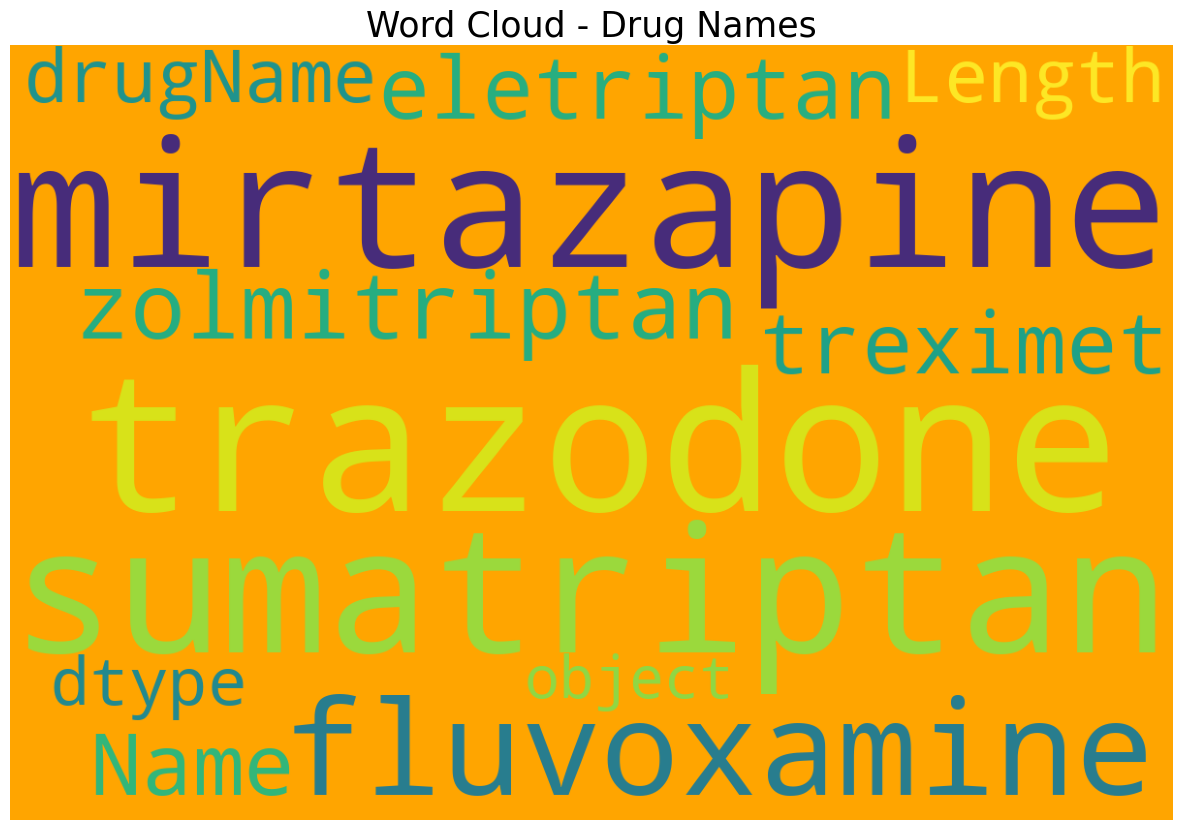

In [ ]:

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Bar plot of the top 20 drugs with the 10/10 rating: 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1183 Ratings in the data set for 'Levonorgestrel'.

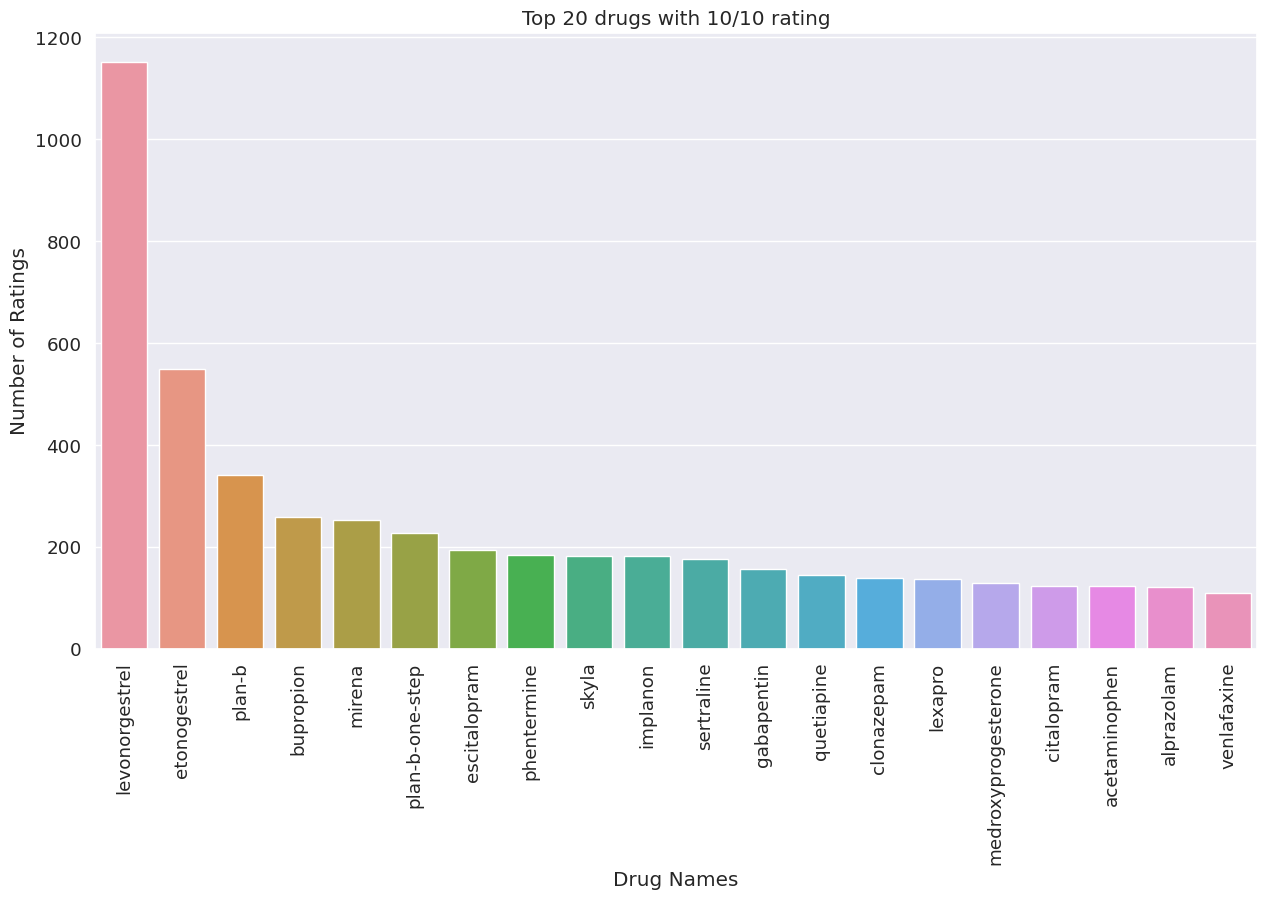

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Bar plot shows the Top 20 drugs with the 1/10 rating: 'Etonogestrel' is the drug with the highest number of 1/10 ratings, about 767.

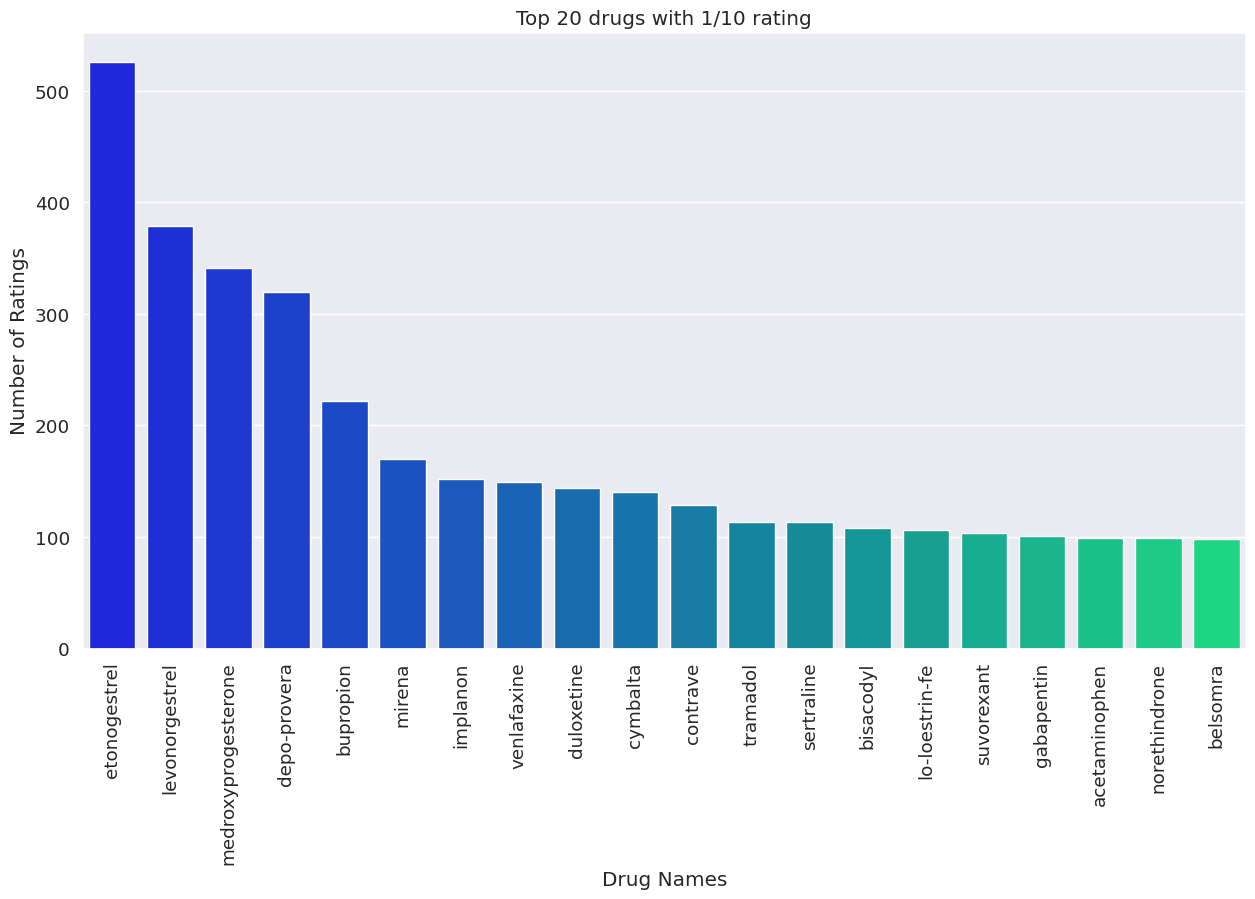

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Donut chart to represent share of each ratings

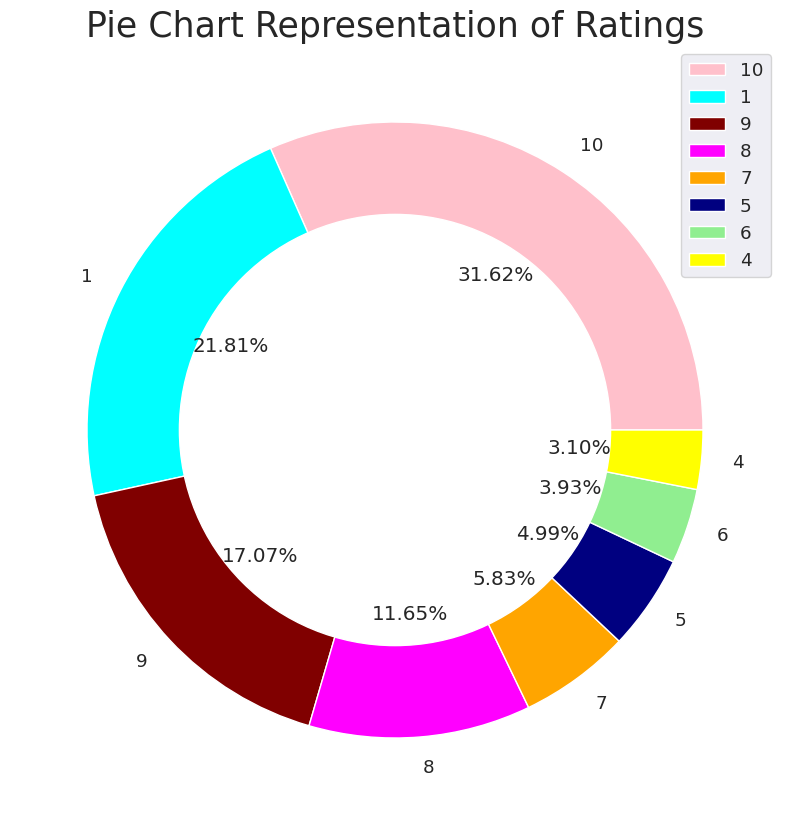

In [ ]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Let's see a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set. We kept only the score 10-9 and 4-3-2-1.

Text(0.5, 0, 'Rating')

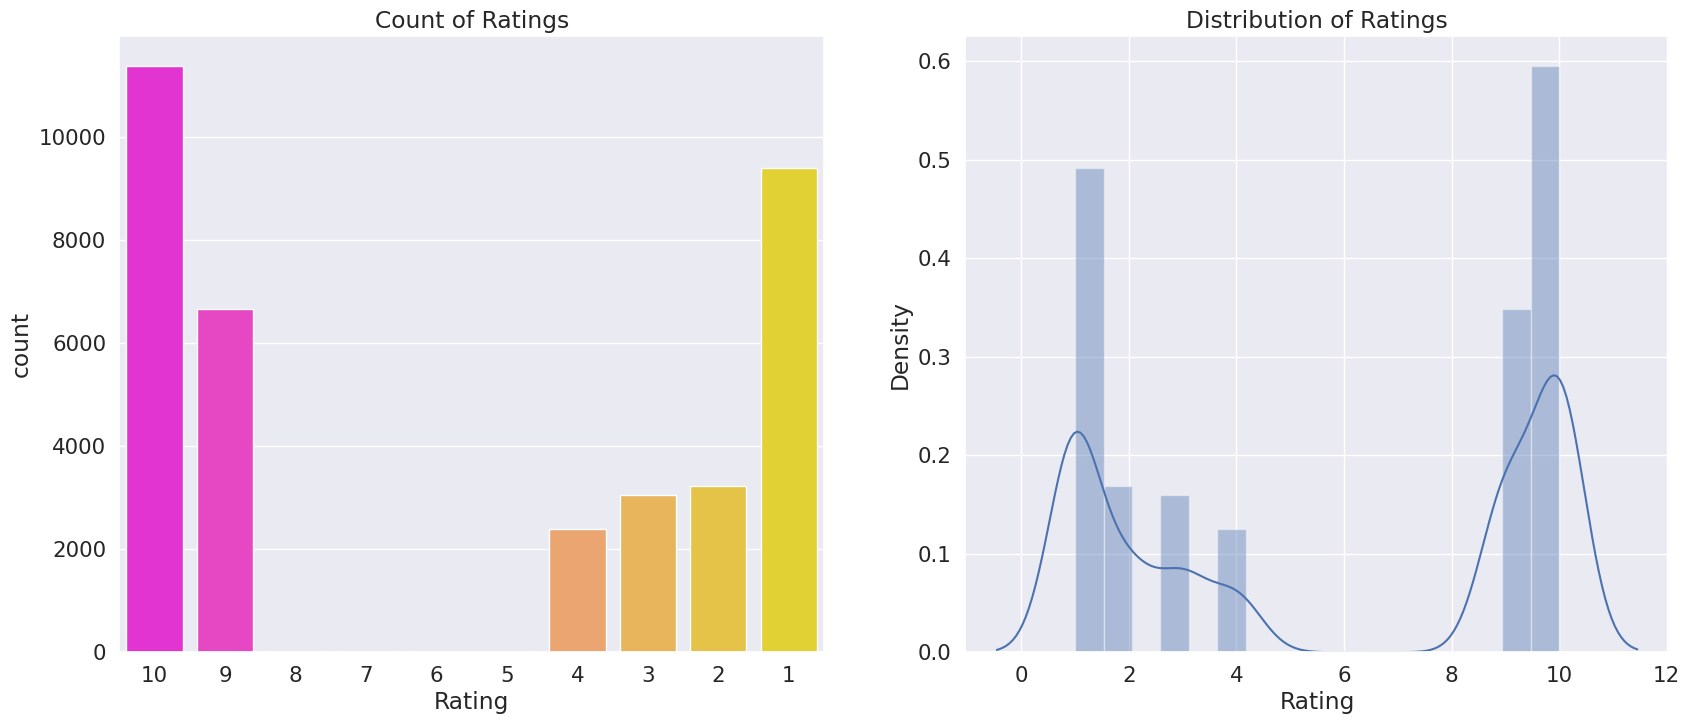

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(x=data["rating"], palette="spring",order = list(range(10, 0, -1)), ax = ax[0])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

Barplot sof the top 10 conditions the people are suffering: in this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and Anxiety.

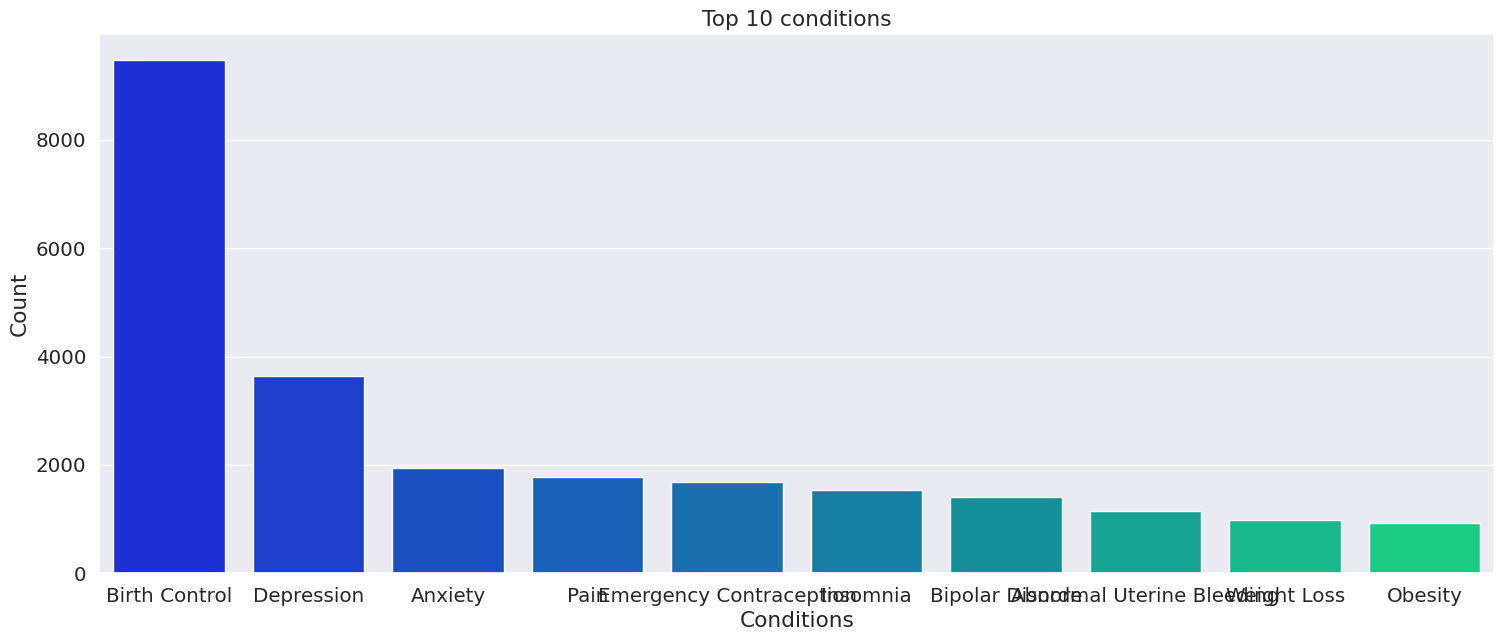

In [ ]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");


Top 10 drugs which are used for the top conditions. In this case Etonogestrel' is the most prominent drug

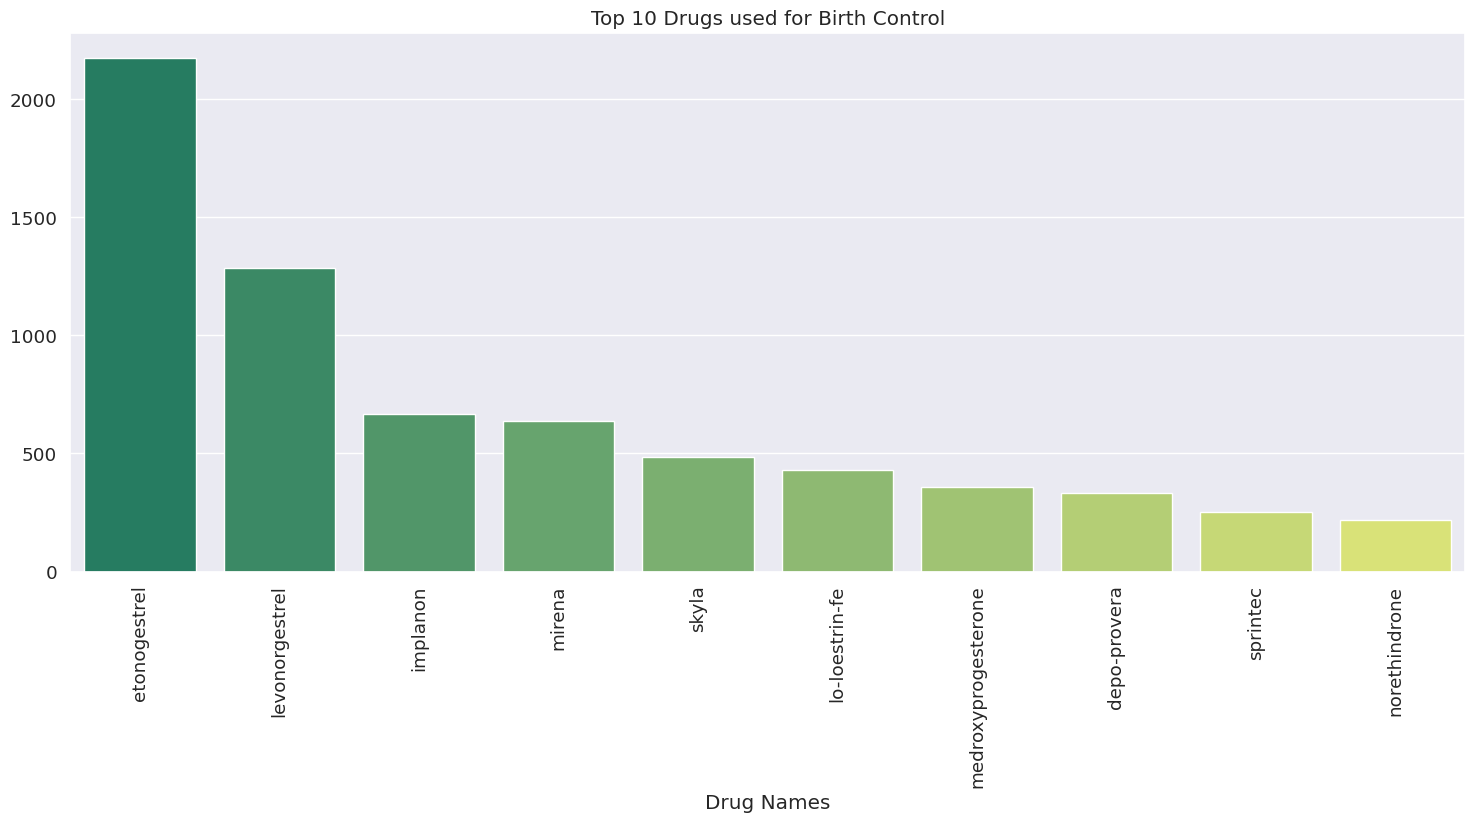

In [ ]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

Word Cloud: let's see the most popular words in reviews

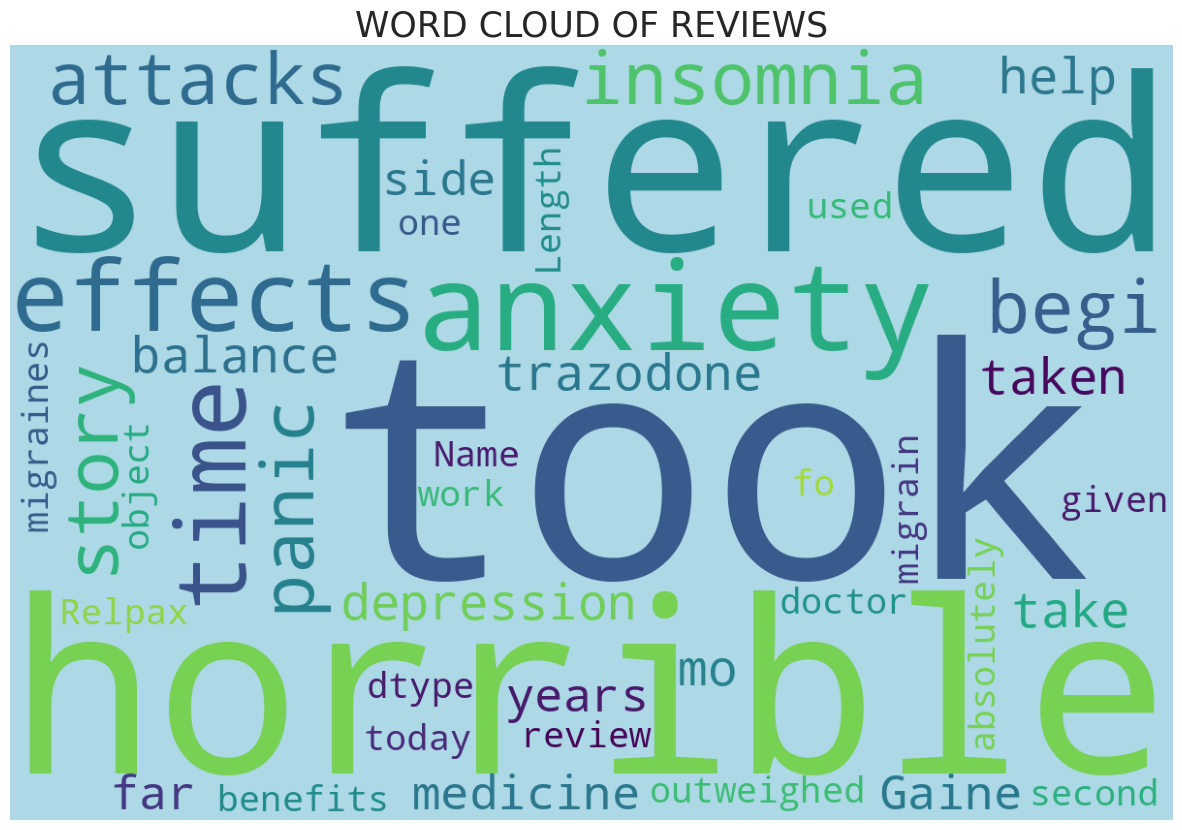

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

We do not use Positiveness column for understanding the % of reviews with positive and negative rating because it's link to the drugClass. For each drugClass the number of positive review is equal to the number of the negative ones! So that, we build a new columns: Review_Sentiment which is not linked to the drugClass and allows us to differentiate the reviews with rating >= 9 and reviews with rating < 4.

In [ ]:
data['positiveness'].value_counts()

 1    18047
-1    18047
Name: positiveness, dtype: int64

In [ ]:
data.loc[(data['rating'] >= 9), 'Review_Sentiment'] = 1
data.loc[(data['rating'] <= 4), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    18047
0.0    18047
Name: Review_Sentiment, dtype: int64

Build a pie chart to see sentiments of the patients

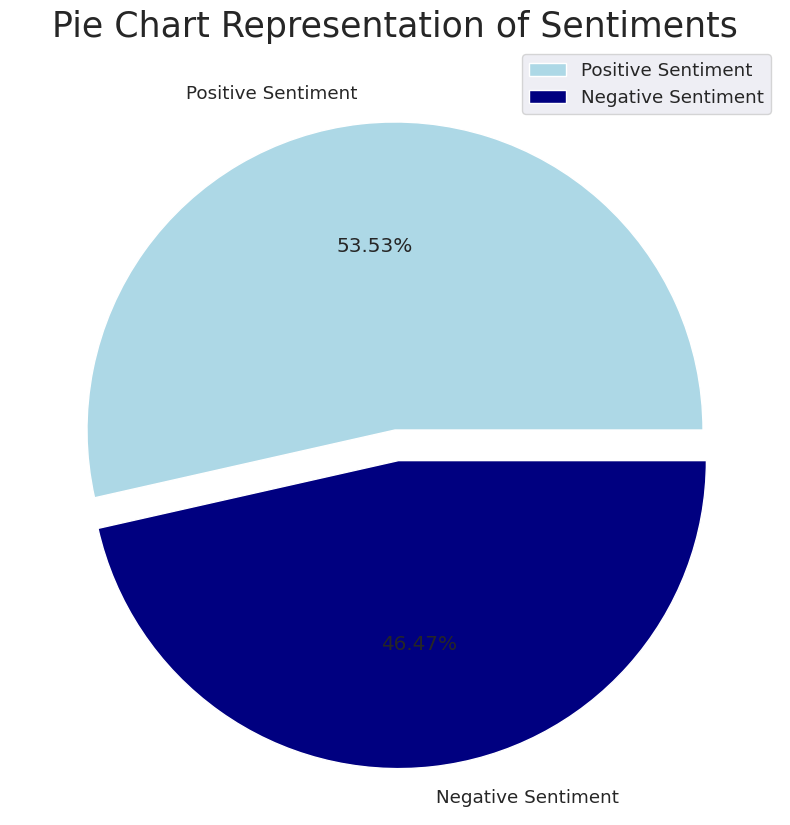

In [ ]:
size = [18047, 15665]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

Word Cloud fot the positive sentiments

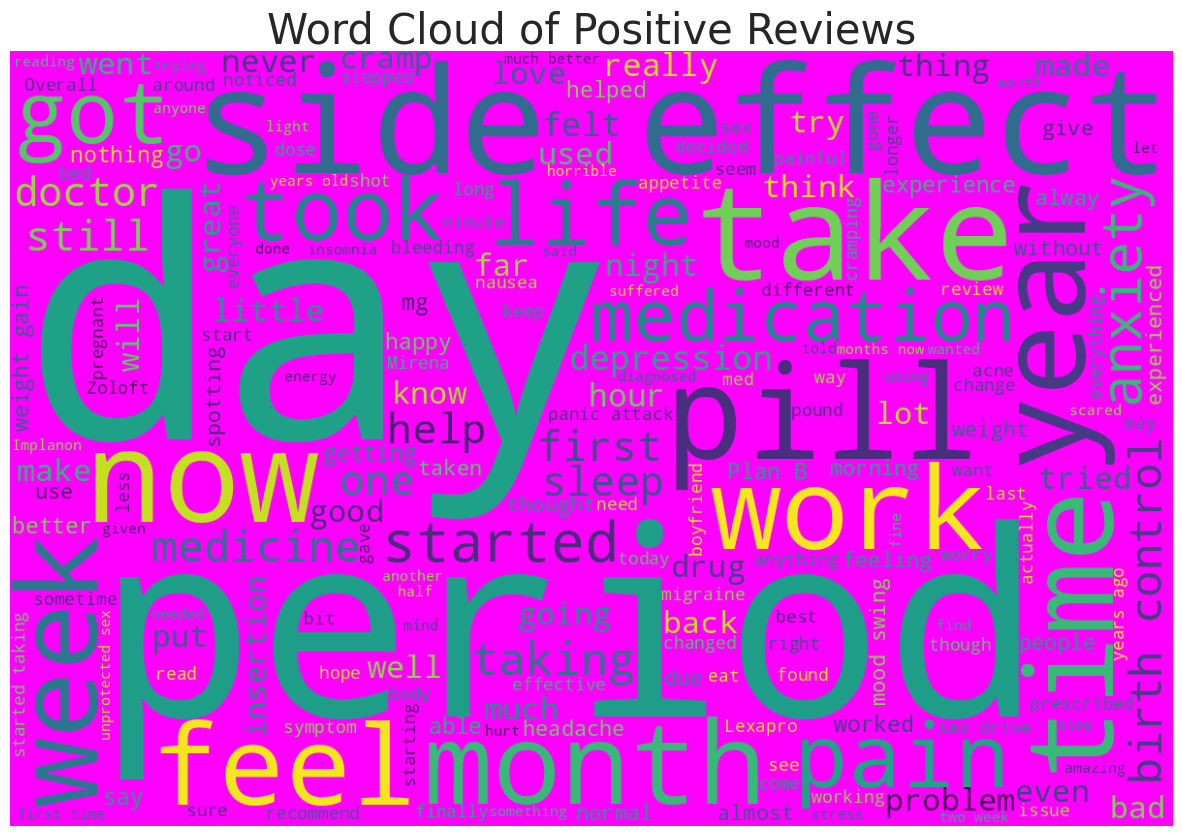

In [ ]:
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Let's see a Word Cloud for the Negative sentiments

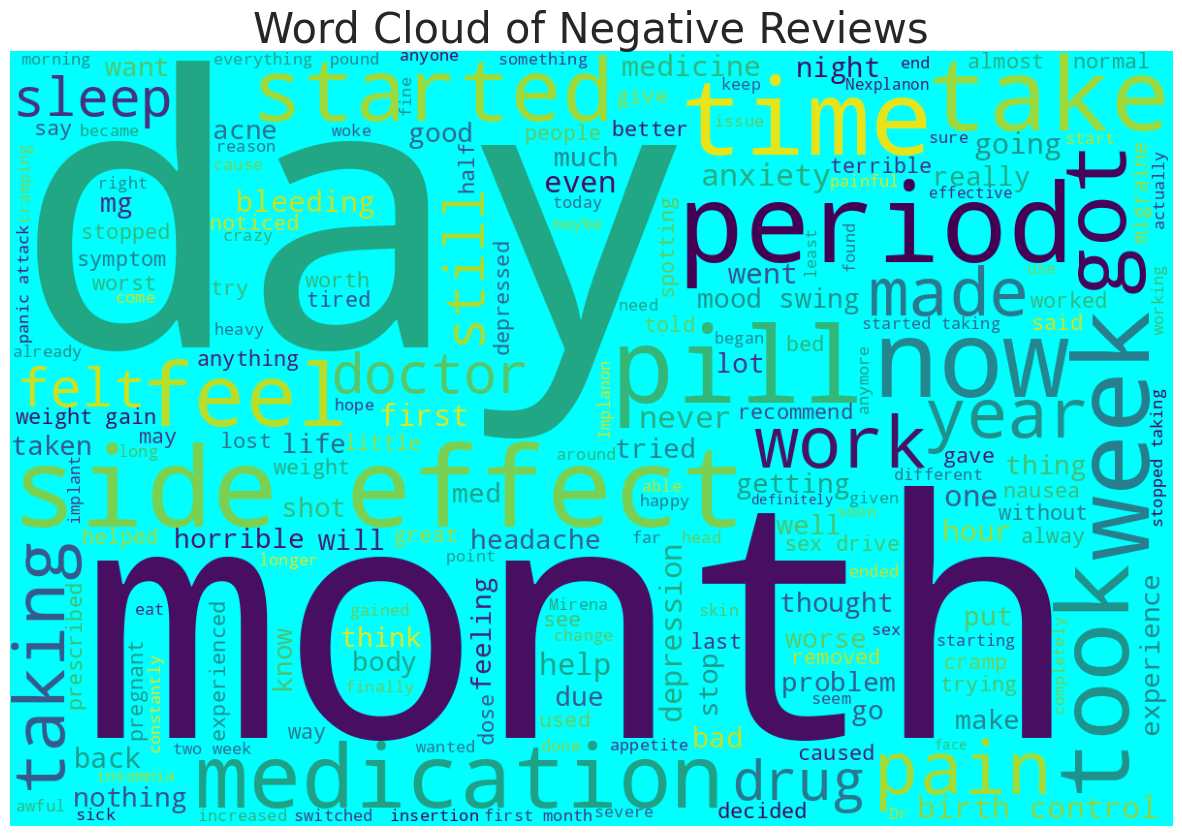

In [ ]:
negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Change the datetime format and extract year, month and day from date

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')
data['Year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

Look at the count of ratings per year, per month and per days

Text(0.5, 0, 'Year')

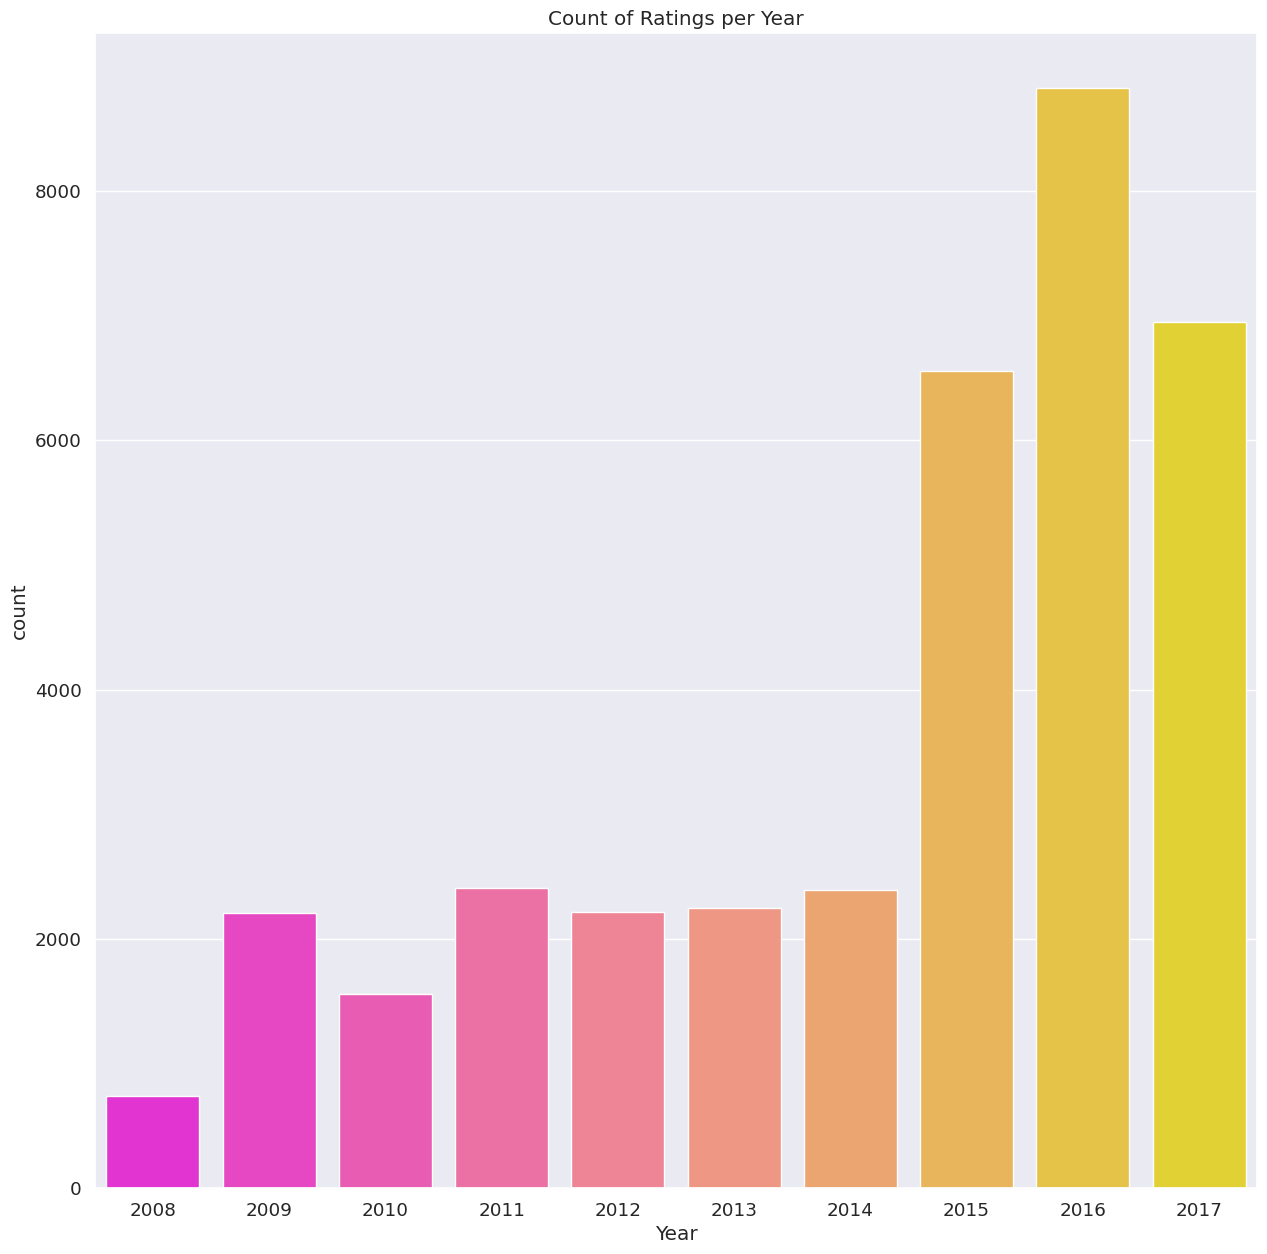

In [ ]:
s=sns.countplot(x=data["Year"], palette="spring")
s.set_title('Count of Ratings per Year')
s.set_xlabel("Year")


Text(0.5, 0, 'Month')

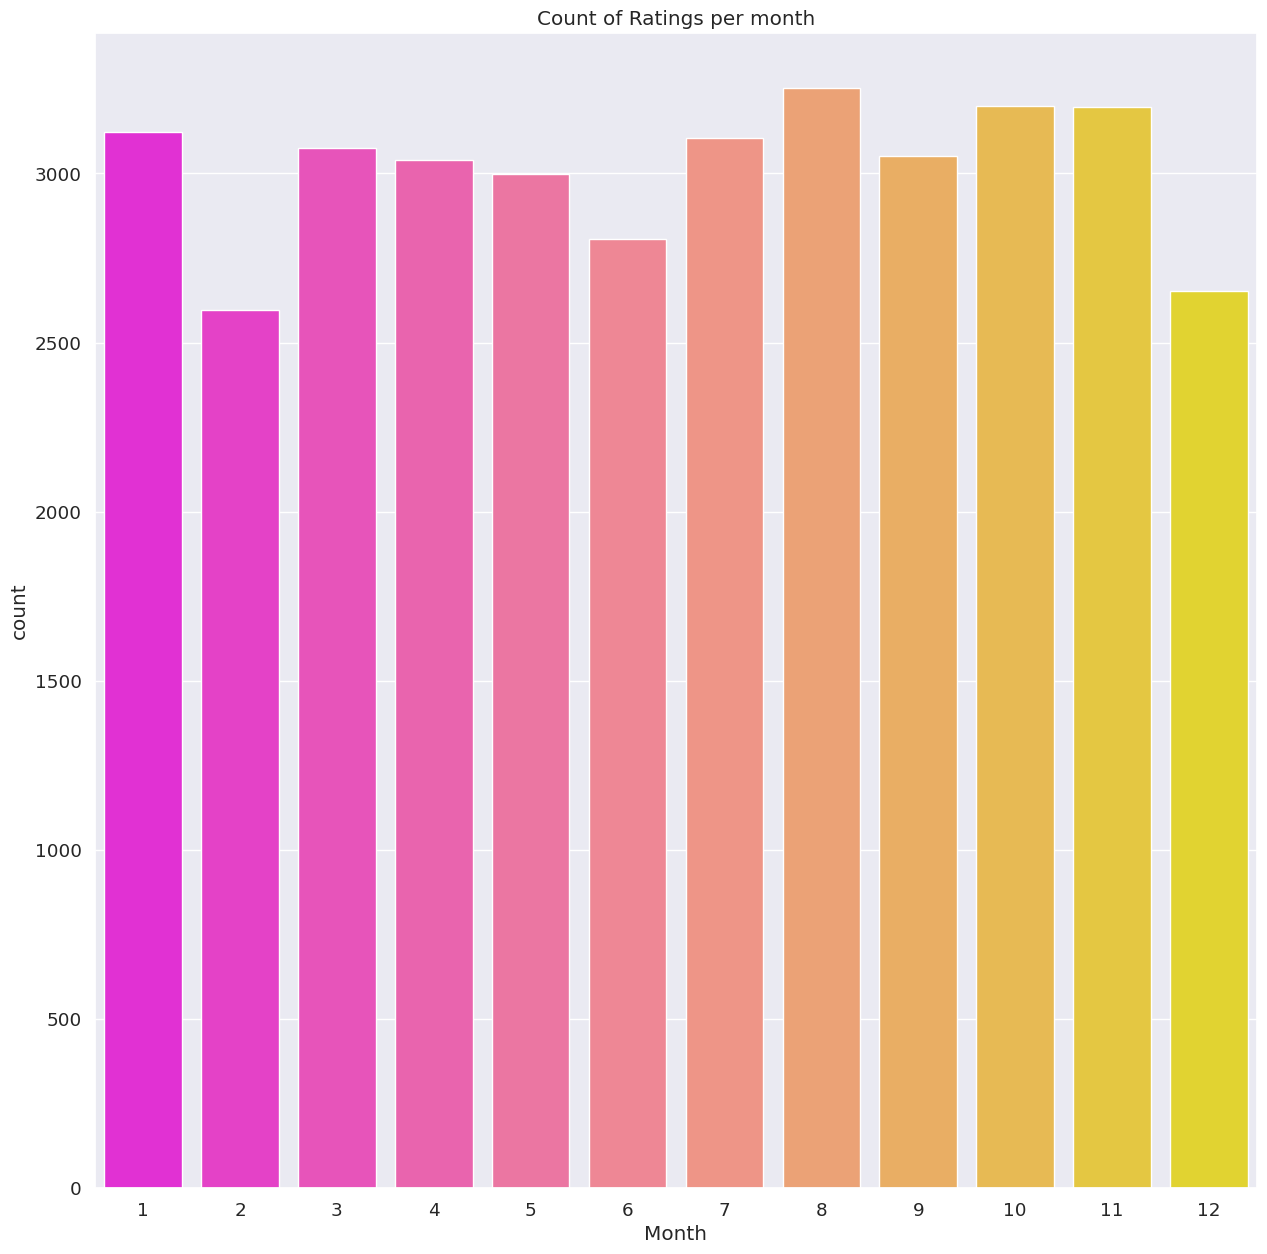

In [ ]:
# looking at the no. of reviews in each of the months

s=sns.countplot(x=data["month"], palette="spring")
s.set_title('Count of Ratings per month')
s.set_xlabel("Month")

Text(0.5, 0, 'Day')

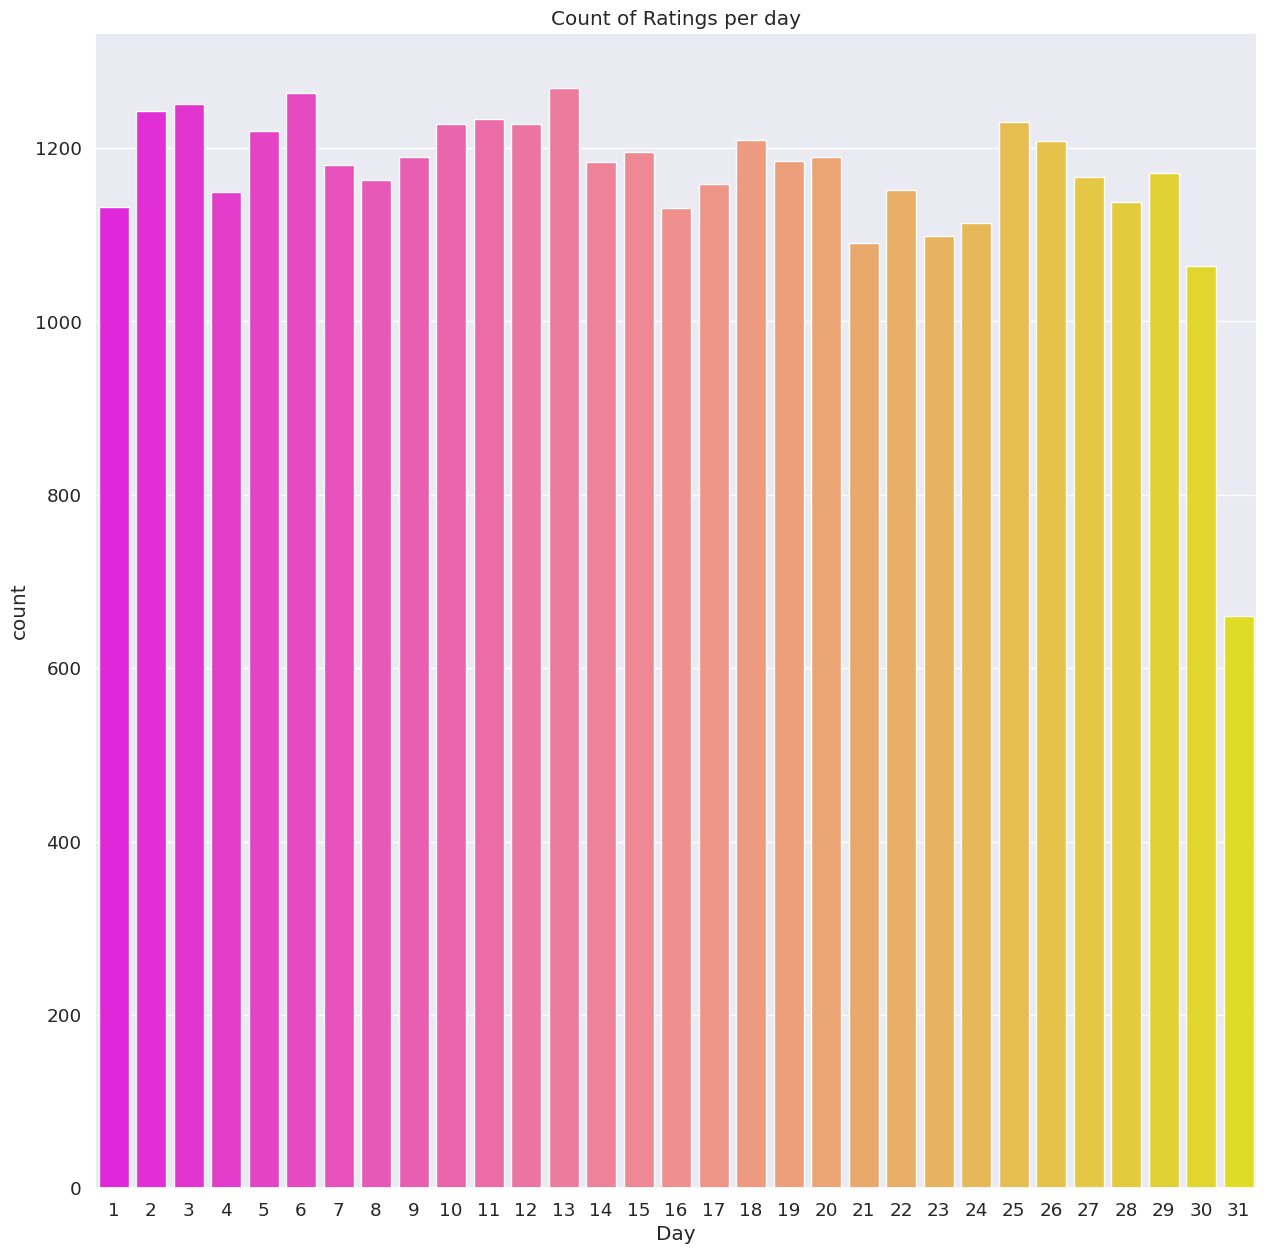

In [ ]:
 #looking at the no. of reviews in each of the day

s=sns.countplot(x=data["day"], palette="spring")
s.set_title('Count of Ratings per day')
s.set_xlabel("Day")

## Pre-processing

In [ ]:
# Import Text Mining libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from textblob import TextBlob
import gensim
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import string
from nltk import ngrams
from nltk.stem import SnowballStemmer

In [ ]:
# Define useful classes
%%capture
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Pre-processing steps for Text Classification Sentiment Analysis

In [ ]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

Create a 'review_clean' column which contains the preprocessed reviews

In [ ]:
data['review_clean'] = review_clean(data['review'])

Remove stopwords in preprocessed reviews

In [ ]:
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

Remove the word stems in preprocessed reviews using the Snowball Stemmer

In [ ]:
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

Define a Sentiment polarity of the reviews

In [ ]:
def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

Create 'sentiment' column with the sentiment score for each review and define a 'sentiment_clean' column which contains the polarity score for the preprocessed reviews

In [ ]:
data['sentiment'] = sentiment(data['review'])

In [ ]:
data['sentiment_clean'] = sentiment(data['review_clean'])

Cleaning the reviews without removing the stop words and using snowball stemmer

In [ ]:
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

Delate any na values in data

In [ ]:
data = data.dropna(how="any", axis=0)

Create new features engineering

In [ ]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

Look at the correlation heatmap of the features engineered

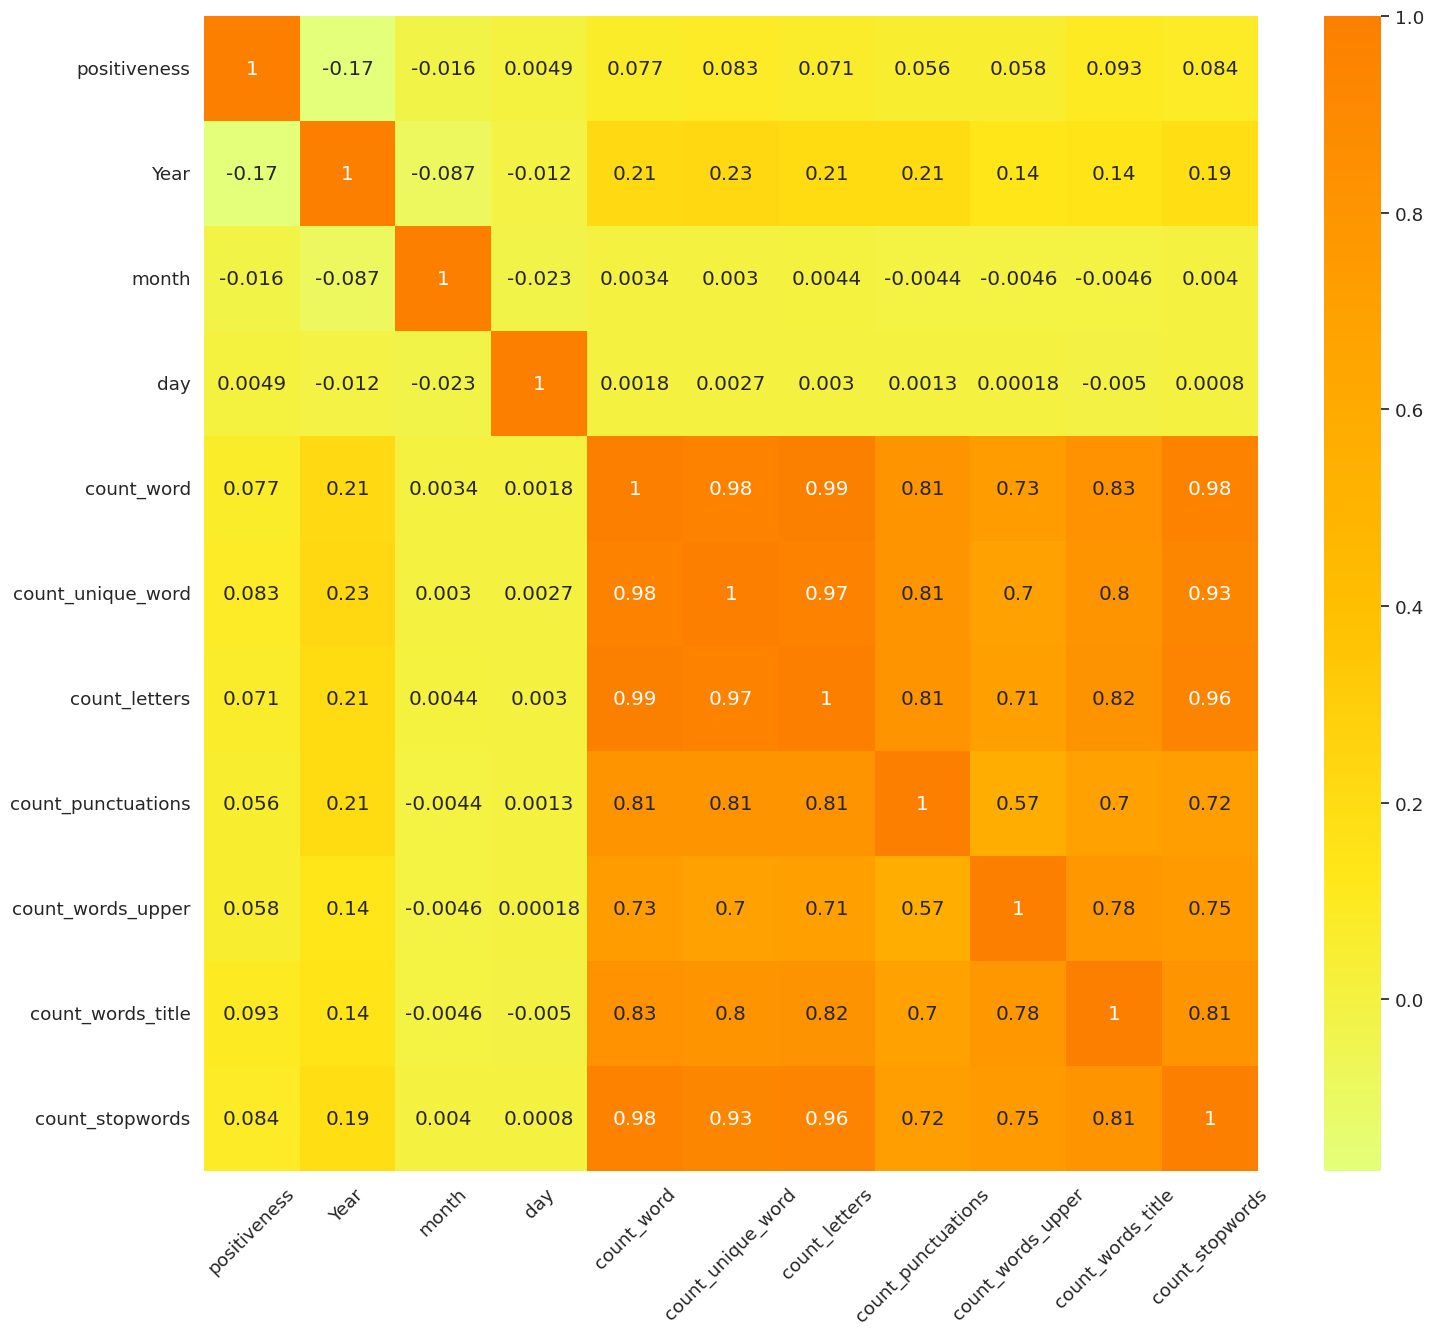

In [ ]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);


Build a Label Encoder used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling.

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

Defining Features and splitting the data as train and test set

In [ ]:
features = data[['condition','sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


LightGBM

In [ ]:
# Training Model - I
g = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = g.fit(X_train, y_train)


LightGBM Predictions

In [ ]:
predictions = model.predict(X_test)
print ("The Accuracy of the model on testing data is : ", accuracy_score(y_test, predictions), '\n')
predictions_lgbm = model.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_lgbm), '\n')
print ("The confusion Matrix is \n")
confusion_matrix(y_test, predictions)

The Accuracy of the model on testing data is :  0.7901371381077712 

The Accuracy of the model on training data is :  1.0 

The confusion Matrix is 



array([[2951,  701],
       [ 814, 2753]])

Feature Importance Plot using LGBM

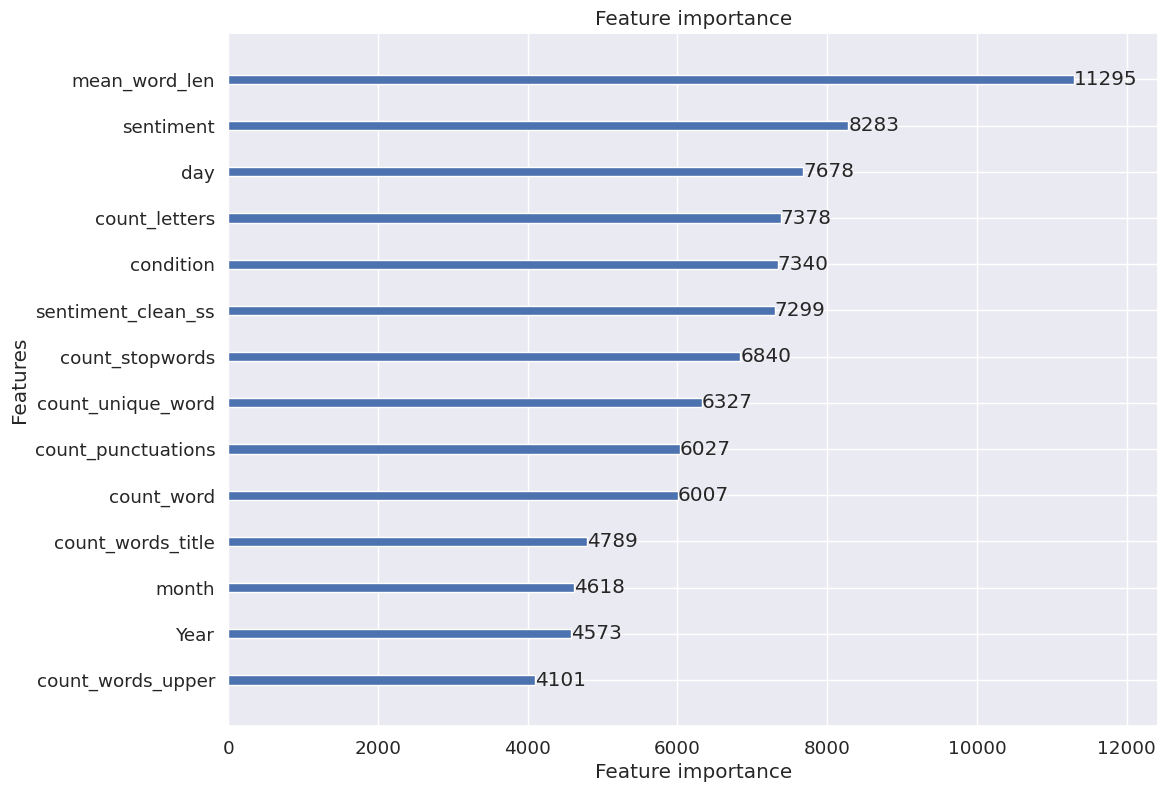

In [ ]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

AUC & ROC Curve

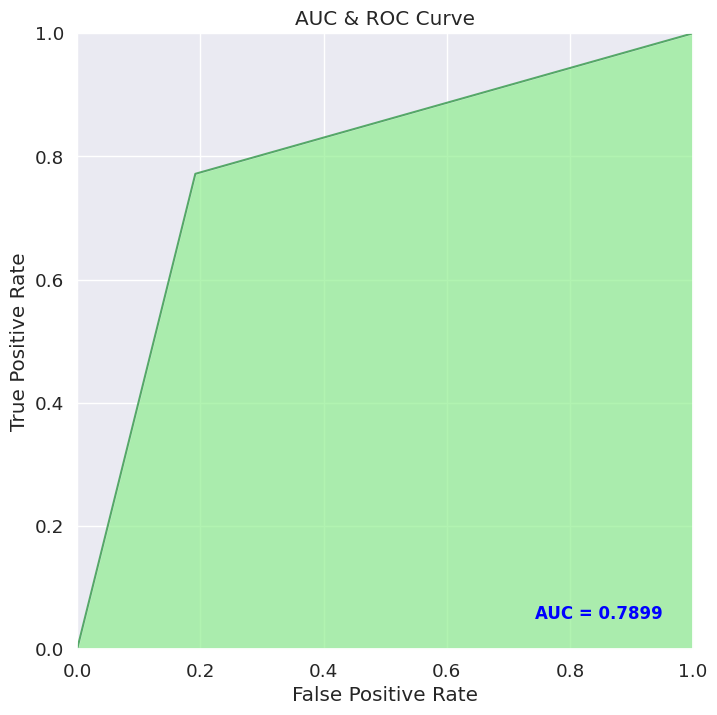

In [ ]:
auc = metrics.roc_auc_score(y_test, predictions)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

LogisticRegression

In [ ]:
LR = LogisticRegression(solver="liblinear").fit(X_train, y_train)
predictions_5 = LR.predict(X_test)
roc_auc = roc_auc_score(y_test,predictions, multi_class='ovr')
print(roc_auc) 
confusion_matrix(y_test, predictions_5)


0.7899237058333495


array([[2376, 1276],
       [1063, 2504]])

AUC & ROC Curve

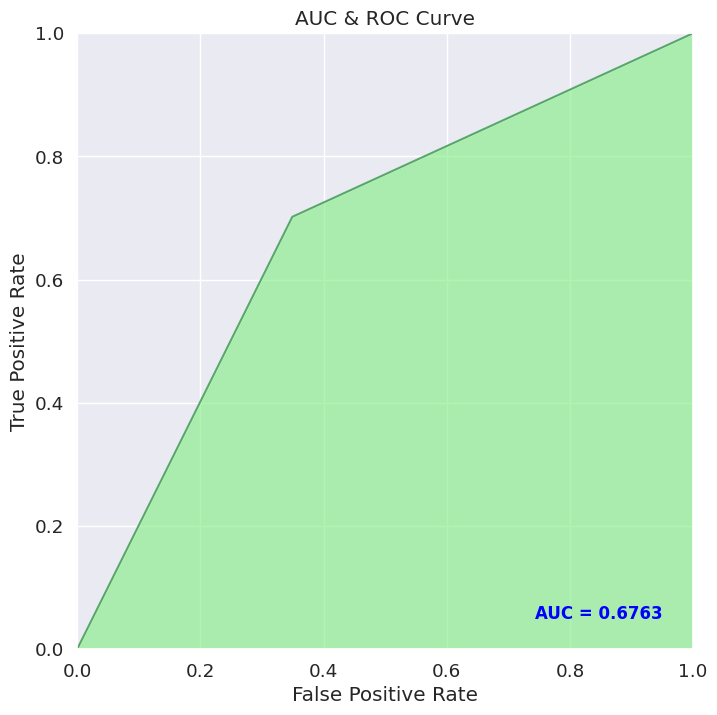

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_5)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_5)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Naive Bayes Classifier

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
# instantiate the model
gnb = GaussianNB()
model_gnb=gnb.fit(X_train, y_train)    
predictions_55 = model_gnb.predict(X_test)
print ("The Accuracy of the testing model is : ", accuracy_score(y_test, predictions_55), '\n')
predictions_51 = model_gnb.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_51), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_5), '\n')

print (classification_report(y_test, predictions_5))
     

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions_5)))

The Accuracy of the testing model is :  0.6675439811608256 

The Accuracy of the model on training data is :  0.6714112554112555 

The confusion Matrix is 

[[2376 1276]
 [1063 2504]] 

              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67      3652
         1.0       0.66      0.70      0.68      3567

    accuracy                           0.68      7219
   macro avg       0.68      0.68      0.68      7219
weighted avg       0.68      0.68      0.68      7219

Model accuracy score: 0.6760


AUC & ROC Curve

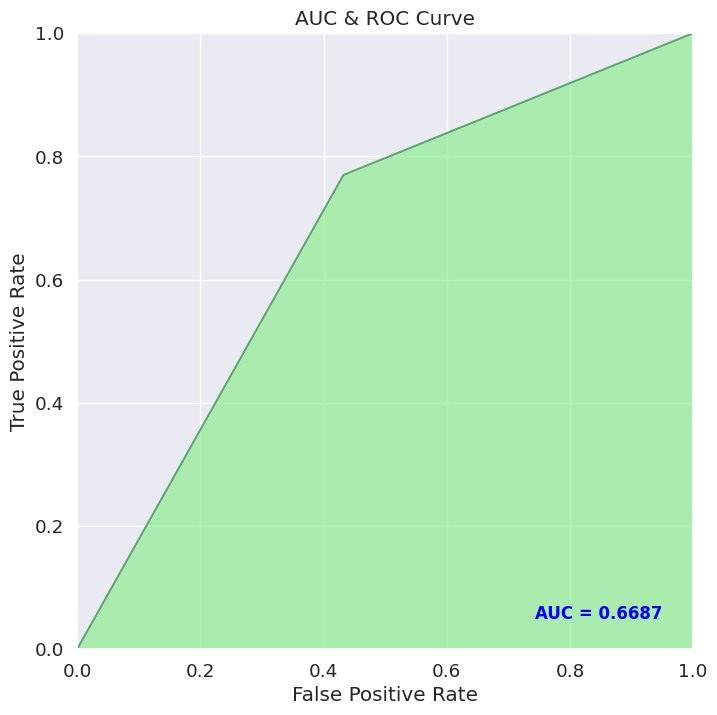

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_55)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_55)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()